In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [2]:
df1 = pd.read_csv('EC-EARTH3_historical_HCM_city.csv')
df1

,Date,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1/1/1971,80.34879,0.015062,0.0,0,101018.1,383.4469,180.6118,2.215147,297.2230,301.8993,293.2424
1,1/2/1971,79.93636,0.015472,0.0,0,101050.8,389.1270,213.2411,1.913304,297.7553,302.6584,293.2602
2,1/3/1971,77.99393,0.014693,0.0,0,101152.2,372.2720,211.4194,2.494411,297.3263,302.8595,292.9391
3,1/4/1971,78.18733,0.014581,0.0,0,101188.1,368.6230,231.0574,1.968062,297.1645,302.6886,292.8920
4,1/5/1971,78.41940,0.015016,0.0,0,101157.3,377.7236,219.8366,1.896095,297.5956,302.9987,292.8572
...,...,...,...,...,...,...,...,...,...,...,...,...
16066,12/27/2014,66.88143,0.015731,0.0,0,100918.1,409.3165,233.3314,1.575402,300.9895,305.9067,296.6883
16067,12/28/2014,68.28598,0.015828,0.0,0,100959.9,398.9458,233.4163,1.594375,300.7494,306.1474,296.5995
16068,12/29/2014,68.91546,0.016553,0.0,0,100911.0,416.5856,237.3476,1.612947,301.3431,306.0169,296.3938
16069,12/30/2014,65.27071,0.015247,0.0,0,100817.1,401.5114,238.6016,2.209691,300.8564,305.8985,295.6623


In [3]:
dfcopy = df1.copy()

In [4]:
# Chọn dữ liệu từ ngày 1-1-1980 trở đi
start_date = dt.datetime(1980, 1, 1)
dfcopy['Date'] = pd.to_datetime(dfcopy['Date'])
GCM_data = dfcopy[dfcopy['Date'] >= start_date]

In [5]:
GCM_data

,Date,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
3287,1980-01-01,73.21886,0.014942,0.0,0,100925.8,411.9823,148.4212,3.117005,298.6114,303.0861,295.4674
3288,1980-01-02,72.26194,0.014010,0.0,0,101059.3,401.0091,120.5232,3.171589,297.7850,301.0477,294.0181
3289,1980-01-03,66.64259,0.012154,0.0,0,101216.2,371.4076,166.0293,3.124027,296.8033,301.7290,292.2146
3290,1980-01-04,67.19090,0.012316,0.0,0,101247.8,364.0367,235.6381,2.887169,296.8911,303.1218,292.4401
3291,1980-01-05,70.18818,0.013292,0.0,0,101034.4,375.5177,234.2899,2.202845,297.3929,302.7381,292.1223
...,...,...,...,...,...,...,...,...,...,...,...,...
16066,2014-12-27,66.88143,0.015731,0.0,0,100918.1,409.3165,233.3314,1.575402,300.9895,305.9067,296.6883
16067,2014-12-28,68.28598,0.015828,0.0,0,100959.9,398.9458,233.4163,1.594375,300.7494,306.1474,296.5995
16068,2014-12-29,68.91546,0.016553,0.0,0,100911.0,416.5856,237.3476,1.612947,301.3431,306.0169,296.3938
16069,2014-12-30,65.27071,0.015247,0.0,0,100817.1,401.5114,238.6016,2.209691,300.8564,305.8985,295.6623


In [6]:
actual_data = pd.read_excel('Precipitation_actual.xlsx')
actual_data

,Date,actual Precipitation
0,1980-01-01,0.0
1,1980-01-02,0.0
2,1980-01-03,0.0
3,1980-01-04,0.0
4,1980-01-05,0.0
...,...,...
12779,2014-12-27,0.0
12780,2014-12-28,0.0
12781,2014-12-29,0.0
12782,2014-12-30,0.0


# Merged data

In [7]:
# Merge GCM data into the new DataFrame based on date
merged_data = pd.merge(actual_data, GCM_data, on='Date', how='left')
merged_data

,Date,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,0.0,73.21886,0.014942,0.0,0,100925.8,411.9823,148.4212,3.117005,298.6114,303.0861,295.4674
1,1980-01-02,0.0,72.26194,0.014010,0.0,0,101059.3,401.0091,120.5232,3.171589,297.7850,301.0477,294.0181
2,1980-01-03,0.0,66.64259,0.012154,0.0,0,101216.2,371.4076,166.0293,3.124027,296.8033,301.7290,292.2146
3,1980-01-04,0.0,67.19090,0.012316,0.0,0,101247.8,364.0367,235.6381,2.887169,296.8911,303.1218,292.4401
4,1980-01-05,0.0,70.18818,0.013292,0.0,0,101034.4,375.5177,234.2899,2.202845,297.3929,302.7381,292.1223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,0.0,66.88143,0.015731,0.0,0,100918.1,409.3165,233.3314,1.575402,300.9895,305.9067,296.6883
12780,2014-12-28,0.0,68.28598,0.015828,0.0,0,100959.9,398.9458,233.4163,1.594375,300.7494,306.1474,296.5995
12781,2014-12-29,0.0,68.91546,0.016553,0.0,0,100911.0,416.5856,237.3476,1.612947,301.3431,306.0169,296.3938
12782,2014-12-30,0.0,65.27071,0.015247,0.0,0,100817.1,401.5114,238.6016,2.209691,300.8564,305.8985,295.6623


In [8]:
null_counts = merged_data.isna().sum()
null_counts

Date                    0
actual Precipitation    0
hurs                    0
huss                    0
pr                      0
prsn                    0
ps                      0
rlds                    0
rsds                    0
sfcwind                 0
tas                     0
tasmax                  0
tasmin                  0
dtype: int64

# Convert unit of GCM precipitation

In [9]:
# Change the unit of GCM precipitation form kg m-2 s-1 to mm/day
merged_data['pr'] = merged_data['pr'] * 86400
merged_data

,Date,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,0.0,73.21886,0.014942,0.0,0,100925.8,411.9823,148.4212,3.117005,298.6114,303.0861,295.4674
1,1980-01-02,0.0,72.26194,0.014010,0.0,0,101059.3,401.0091,120.5232,3.171589,297.7850,301.0477,294.0181
2,1980-01-03,0.0,66.64259,0.012154,0.0,0,101216.2,371.4076,166.0293,3.124027,296.8033,301.7290,292.2146
3,1980-01-04,0.0,67.19090,0.012316,0.0,0,101247.8,364.0367,235.6381,2.887169,296.8911,303.1218,292.4401
4,1980-01-05,0.0,70.18818,0.013292,0.0,0,101034.4,375.5177,234.2899,2.202845,297.3929,302.7381,292.1223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,0.0,66.88143,0.015731,0.0,0,100918.1,409.3165,233.3314,1.575402,300.9895,305.9067,296.6883
12780,2014-12-28,0.0,68.28598,0.015828,0.0,0,100959.9,398.9458,233.4163,1.594375,300.7494,306.1474,296.5995
12781,2014-12-29,0.0,68.91546,0.016553,0.0,0,100911.0,416.5856,237.3476,1.612947,301.3431,306.0169,296.3938
12782,2014-12-30,0.0,65.27071,0.015247,0.0,0,100817.1,401.5114,238.6016,2.209691,300.8564,305.8985,295.6623


# Calculate mean of each column monthly

In [10]:
merged_data = merged_data.set_index('Date')
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

merged_data = create_features(merged_data)

In [11]:
merged_data

,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
1980-01-01,0.0,73.21886,0.014942,0.0,0,100925.8,411.9823,148.4212,3.117005,298.6114,303.0861,295.4674,1,1,1980,1,1,1
1980-01-02,0.0,72.26194,0.014010,0.0,0,101059.3,401.0091,120.5232,3.171589,297.7850,301.0477,294.0181,1,1,1980,2,2,1
1980-01-03,0.0,66.64259,0.012154,0.0,0,101216.2,371.4076,166.0293,3.124027,296.8033,301.7290,292.2146,1,1,1980,3,3,1
1980-01-04,0.0,67.19090,0.012316,0.0,0,101247.8,364.0367,235.6381,2.887169,296.8911,303.1218,292.4401,1,1,1980,4,4,1
1980-01-05,0.0,70.18818,0.013292,0.0,0,101034.4,375.5177,234.2899,2.202845,297.3929,302.7381,292.1223,1,1,1980,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.0,66.88143,0.015731,0.0,0,100918.1,409.3165,233.3314,1.575402,300.9895,305.9067,296.6883,4,12,2014,361,27,52
2014-12-28,0.0,68.28598,0.015828,0.0,0,100959.9,398.9458,233.4163,1.594375,300.7494,306.1474,296.5995,4,12,2014,362,28,52
2014-12-29,0.0,68.91546,0.016553,0.0,0,100911.0,416.5856,237.3476,1.612947,301.3431,306.0169,296.3938,4,12,2014,363,29,1


In [12]:
# Average precipitation by month and year
sumAcPrMonth = merged_data.groupby(['month', 'year'])['actual Precipitation'].mean().reset_index()
# Average hurs by month and year
avgGCMHursMonth = merged_data.groupby(['month', 'year'])['hurs'].mean().reset_index()
# Average huss by month and year
avgGCMHussMonth = merged_data.groupby(['month', 'year'])['huss'].mean().reset_index()
# Average GCM precipitation by month and year
sumGCMPrMonth = merged_data.groupby(['month', 'year'])['pr'].mean().reset_index()
# Average ps by month and year
avgGCMPsMonth = merged_data.groupby(['month', 'year'])['ps'].mean().reset_index()
# Average Prsn by month and year
avgPrsnMonth = merged_data.groupby(['month', 'year'])['prsn'].mean().reset_index()
# Average rlds by month and year
avgGCMRldsMonth = merged_data.groupby(['month', 'year'])['rlds'].mean().reset_index()
# Average rsds by month and year
avgGCMRsdsMonth = merged_data.groupby(['month', 'year'])['rsds'].mean().reset_index()
# Average sfcwind by month and year
avgGCMSfcwindMonth = merged_data.groupby(['month', 'year'])['sfcwind'].mean().reset_index()
# Average tas by month and year
avgGCMtasMonth = merged_data.groupby(['month', 'year'])['tas'].mean().reset_index()
# Average tasmax by month and year
avgGCMtasmaxMonth = merged_data.groupby(['month', 'year'])['tasmax'].mean().reset_index()
# Average tasmin by month and year
avgGCMtasminMonth = merged_data.groupby(['month', 'year'])['tasmin'].mean().reset_index()

In [13]:
avgGCMtasminMonth

,month,year,tasmin
0,1,1980,294.447606
1,1,1981,294.533113
2,1,1982,294.881039
3,1,1983,293.749132
4,1,1984,294.027848
...,...,...,...
415,12,2010,297.042216
416,12,2011,296.522265
417,12,2012,297.298229
418,12,2013,296.152258


In [14]:
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumAcPrMonth.index = sumAcPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHursMonth.index = avgGCMHursMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHussMonth.index = avgGCMHussMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumGCMPrMonth.index = sumGCMPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRldsMonth.index = avgGCMRldsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMPsMonth.index = avgGCMPsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRsdsMonth.index = avgGCMRsdsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMSfcwindMonth.index = avgGCMSfcwindMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasMonth.index = avgGCMtasMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasmaxMonth.index = avgGCMtasmaxMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasminMonth.index = avgGCMtasminMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)

In [15]:
sumAcPrMonth

,month,year,actual Precipitation
1980-01-1,1,1980,1.151613
1981-01-1,1,1981,0.119355
1982-01-1,1,1982,0.000000
1983-01-1,1,1983,0.006452
1984-01-1,1,1984,0.561290
...,...,...,...
2010-12-1,12,2010,1.251613
2011-12-1,12,2011,0.235484
2012-12-1,12,2012,0.819355
2013-12-1,12,2013,1.009677


In [16]:
sumAcPrMonth.index = pd.to_datetime(sumAcPrMonth.index, format='%Y-%m-%d')
avgGCMHursMonth.index = pd.to_datetime(avgGCMHursMonth.index, format='%Y-%m-%d')
avgGCMHussMonth.index = pd.to_datetime(avgGCMHussMonth.index, format='%Y-%m-%d')
sumGCMPrMonth.index = pd.to_datetime(sumGCMPrMonth.index, format='%Y-%m-%d')
avgGCMRldsMonth.index = pd.to_datetime(avgGCMRldsMonth.index, format='%Y-%m-%d')
avgGCMPsMonth.index = pd.to_datetime(avgGCMPsMonth.index, format='%Y-%m-%d')
avgGCMRsdsMonth.index = pd.to_datetime(avgGCMRsdsMonth.index, format='%Y-%m-%d')
avgGCMSfcwindMonth.index = pd.to_datetime(avgGCMSfcwindMonth.index, format='%Y-%m-%d')
avgGCMtasMonth.index = pd.to_datetime(avgGCMtasMonth.index, format='%Y-%m-%d')
avgGCMtasmaxMonth.index = pd.to_datetime(avgGCMtasmaxMonth.index, format='%Y-%m-%d')
avgGCMtasminMonth.index = pd.to_datetime(avgGCMtasminMonth.index, format='%Y-%m-%d')

In [17]:
# Tạo chuỗi thời gian từ tháng 1/1980 đến tháng 12/2014
dates = pd.date_range(start="1980-01-01", end="2014-12-01", freq='MS')

# New dataFrame with average value of each columns monthly

In [18]:
df = pd.DataFrame(index=dates)
df['actual Precipitation'] = sumAcPrMonth.drop(['month','year'], axis = 1)
df['hurs'] = avgGCMHursMonth.drop(['month','year'], axis = 1)
df['huss'] = avgGCMHussMonth.drop(['month','year'], axis = 1)
df['pr'] = sumGCMPrMonth.drop(['month','year'], axis = 1)
df['ps'] = avgGCMPsMonth.drop(['month','year'], axis = 1)
df['rlds'] =avgGCMRldsMonth.drop(['month','year'], axis = 1)
df['rsds'] =avgGCMRsdsMonth.drop(['month','year'], axis = 1)
df['sfcwind'] =avgGCMSfcwindMonth.drop(['month','year'], axis = 1)
df['tas'] =avgGCMtasMonth.drop(['month','year'], axis = 1)
df['tasmax'] =avgGCMtasmaxMonth.drop(['month','year'], axis = 1)
df['tasmin'] =avgGCMtasminMonth.drop(['month','year'], axis = 1)

In [19]:
df

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
1980-01-01,1.151613,70.061595,0.014481,0.034560,100928.903226,395.197616,203.286148,2.081063,298.805994,303.850687,294.447606
1980-02-01,0.065517,71.974504,0.015920,0.078713,100765.048276,397.723383,235.553069,2.384276,299.941886,305.472093,295.803703
1980-03-01,0.006452,81.545991,0.017547,5.487930,100705.225806,405.256594,232.006255,2.086870,299.482755,304.427503,296.321884
1980-04-01,0.086667,83.455366,0.019044,10.382213,100669.460000,413.134940,231.554793,1.606255,300.444400,305.596477,297.095173
1980-05-01,9.293548,85.805076,0.020053,10.150002,100561.296774,422.598735,219.237103,1.879746,300.825413,305.864087,297.713503
...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,11.400000,85.470858,0.020698,7.960729,100608.332258,430.051410,219.727484,1.730392,301.434958,306.256245,298.423039
2014-09-01,11.403333,86.840898,0.020900,10.079484,100657.656667,435.385803,173.915800,2.988920,301.336070,305.515707,298.929353
2014-10-01,9.887097,87.104425,0.020783,7.998879,100644.174194,432.197316,181.425923,1.532220,301.185861,305.477739,298.418897
2014-11-01,6.073333,84.410832,0.019752,2.750455,100742.130000,423.272240,192.316373,1.657013,300.870840,305.049457,297.765003


In [20]:
df.describe()

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,5.236412,79.923707,0.018682,4.660177,100717.628987,418.337729,211.901751,2.222796,300.836407,305.735412,297.408473
std,4.576216,6.969762,0.001856,4.286424,160.270444,13.864135,28.797502,0.510307,1.162665,1.428254,1.364109
min,0.000000,64.600594,0.013570,0.000000,100386.096667,377.144918,149.652564,1.137214,297.733329,302.088694,293.749132
25%,0.543038,72.650620,0.017229,0.306664,100577.169167,409.094835,192.313748,1.819390,300.185972,304.868365,296.531112
50%,4.917849,83.284468,0.019345,3.831852,100699.046774,423.110888,208.518865,2.153401,300.826238,305.519531,297.663687
75%,8.621774,86.044110,0.020133,8.173076,100835.646250,429.020714,231.627710,2.592707,301.406657,306.440418,298.408576
max,17.930000,88.737029,0.021404,15.638523,101160.467742,449.773910,276.136584,3.633285,304.466597,309.875210,300.457833


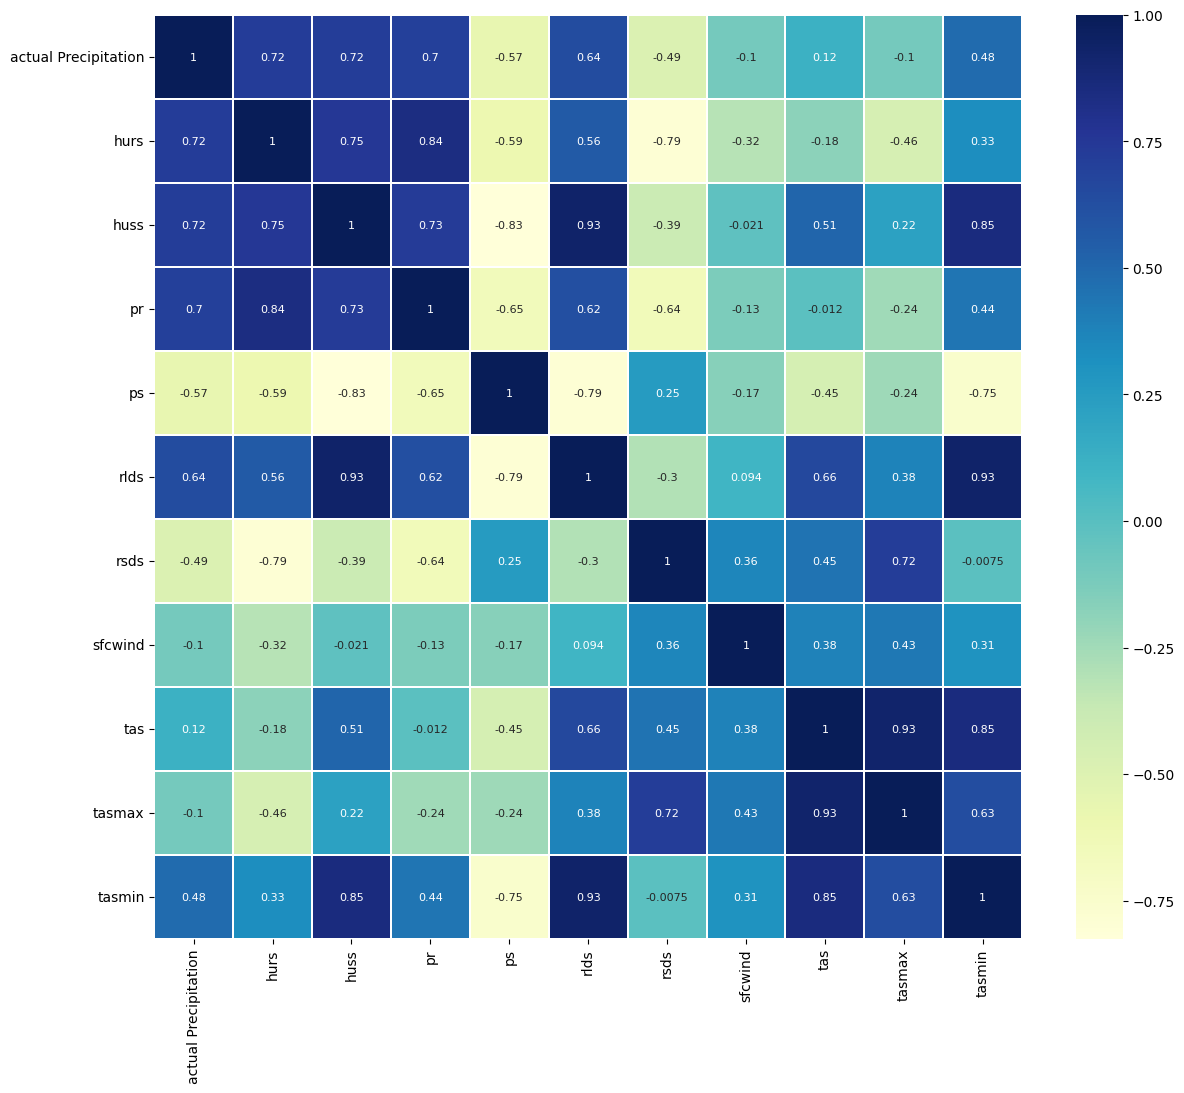

In [21]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)
plt.show()

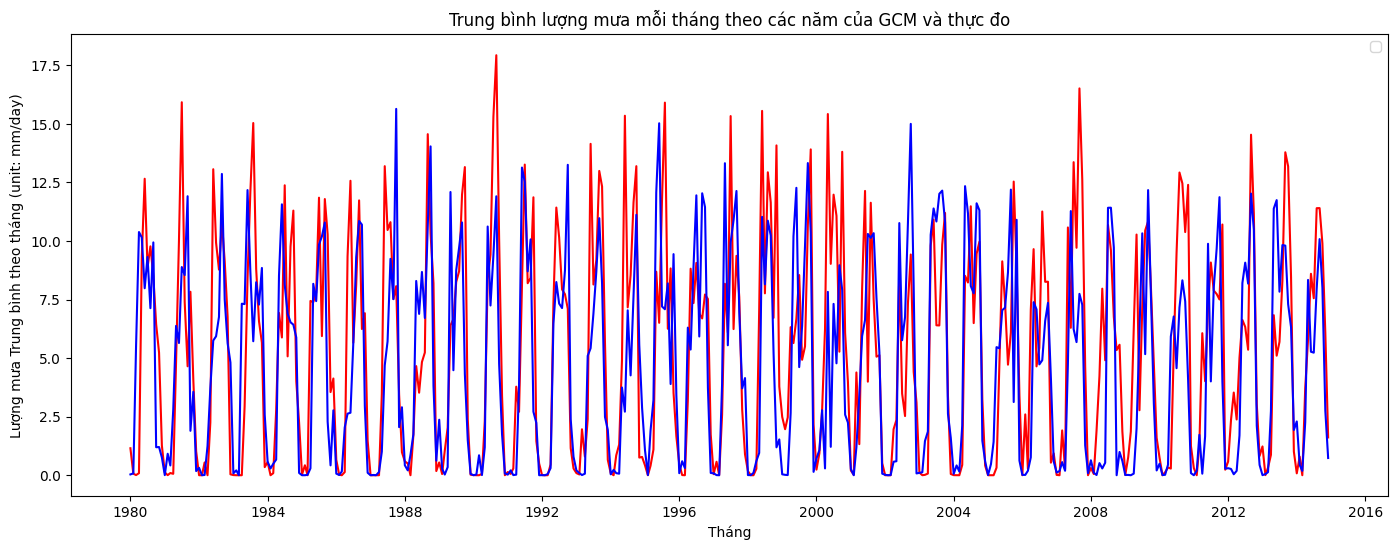

In [22]:
# bar chart
plt.figure(figsize=(17, 6))
plt.plot(df.index, df['actual Precipitation'], color='red')
plt.plot(df.index, df['pr'], color='blue')
# Đặt nhãn cho trục x và y
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa Trung bình theo tháng (unit: mm/day)')
# Đặt tiêu đề cho biểu đồ
plt.title('Trung bình lượng mưa mỗi tháng theo các năm của GCM và thực đo')
# Hiển thị biểu đồ
plt.legend()
plt.show()

# Train test split

In [23]:
start_date = dt.datetime(2010, 1, 1)
df.index = pd.to_datetime(df.index)
train_set = df[df.index < start_date]
test_set = df[df.index >= start_date]

In [24]:
X_train = train_set.drop('actual Precipitation', axis = 1)
X_test = test_set.drop('actual Precipitation', axis = 1)
y_train = train_set['actual Precipitation']
y_test = test_set['actual Precipitation']

# Evaluate function

In [25]:
def NSE(y_test, y_pred):
  return 1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))
nse_scorer = make_scorer(NSE)

In [26]:
# Hàm RMSE custom
def RMSE(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return np.sqrt(mse)
rmse_scorer = make_scorer(RMSE)

In [27]:
def  MAE(y_test, y_pred):
    return mean_absolute_error(y_test, y_pred)
mae_scorer = make_scorer(MAE)

# XGBoost

In [28]:
import xgboost as xgb

In [29]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

- feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

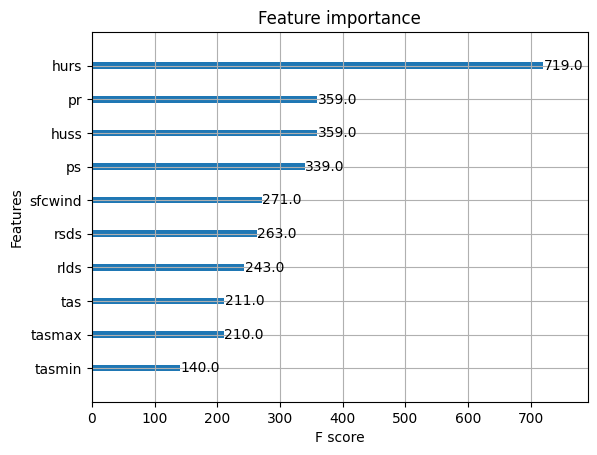

In [30]:
xgb_model.get_params()
xgb.plot_importance(xgb_model)

- Check overfit



In [31]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 0.0064617064930737635
Root mean squared Error: 0.009827855871706925
NSE: 0.9999954309620008


In [32]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 2.525313520924884
Root mean squared Error: 3.324913706506087
NSE: 0.4298964207613736


# LightGBM

In [33]:
import lightgbm as lgb
model_LightGBM = lgb.LGBMRegressor()
model_LightGBM.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 5.217192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMRegressor()

- feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

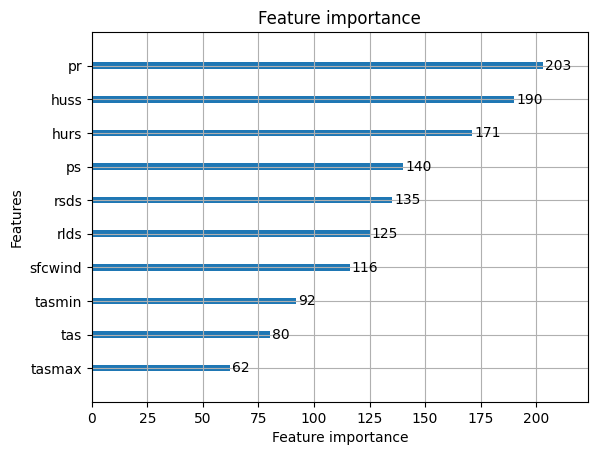

In [34]:
model_LightGBM.get_params()
lgb.plot_importance(model_LightGBM)

- check overfit

In [35]:
y_pred_train_lightgbm = model_LightGBM.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train_lightgbm))
mae = mean_absolute_error(y_train, y_pred_train_lightgbm)
nse = NSE(y_train, y_pred_train_lightgbm)
print('Root mean squared error train: %f' %(rmse))
print('Mean Abosolute error train: %f' %(mae))
print('NSE train: %f' %(nse))

Root mean squared error train: 1.171293
Mean Abosolute error train: 0.824848
NSE train: 0.935101


In [36]:
y_pred_test_lightgbm = model_LightGBM.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_lightgbm))
mae = mean_absolute_error(y_test, y_pred_test_lightgbm)
nse = NSE(y_test, y_pred_test_lightgbm)
print('Root mean squared error test: %f' %(rmse))
print('Mean Abosolute error test: %f' %(mae))
print('NSE test: %f' %(nse))

Root mean squared error test: 2.969083
Mean Abosolute error test: 2.302149
NSE test: 0.545391


# Prepare for GridSeachCV

- feature and target

In [37]:
X = df.drop('actual Precipitation', axis = 1)
y = df['actual Precipitation']

- grid of hyperparameter

In [38]:
# Define the hyperparameters you want to search over
n_estimators = [50, 60, 70, 100, 150, 200]
max_depth = [2, 4, 6, 8]
learning_rate = [0.001, 0.01, 0.1, 0.4, 0.5, 0.8, 1]
lambda_val = [ 0.001, 0.01, 0.1, 0.3, 0.5]
gamma = [0.01, 0.1, 0.3, 0.5, 1, 3, 5]

# Tạo scorer dựa trên RMSE
rmse_scorer = make_scorer(RMSE)

# KFold đảm bảo chia dữ liệu thành các fold.
kfold = KFold(n_splits=10, shuffle=True, random_state= 42)

# Tunning hyperparameters for XGBoost model

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

- searching hyperparameter

In [40]:
# Define the XGBRegressor
model = xgb.XGBRegressor(objective='reg:tweedie')

# Create a parameter grid
param_grid_xgb = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'reg_lambda': lambda_val,
    'learning_rate': learning_rate,
    'gamma': gamma
}

#Đây là tạo một GridSearchCV object để tìm kiếm tập tham số tốt nhất cho mô hình.
#n_job=-1 : dùng CPU, cv=kfold: Sử dụng phương thức cross-validation cho k fold, verbose=1: In kết quả tối ưu hóa trong quá trình thực thi.
grid_search = GridSearchCV(xgb_model,
                           param_grid_xgb,
                           scoring = rmse_scorer,
                           cv=kfold,
                           verbose=1,
                           error_score='raise',
                          )
grid_result = grid_search.fit(X,y)

Fitting 10 folds for each of 5880 candidates, totalling 58800 fits


In [41]:
# Xác định index của kết quả có RMSE nhỏ nhất
best_index = grid_result.cv_results_['mean_test_score'].argmin()

# Truy cập giá trị RMSE và bộ siêu tham số tương ứng
best_rmse = grid_result.cv_results_['mean_test_score'][best_index]
best_params = grid_result.cv_results_['params'][best_index]

# In ra giá trị RMSE nhỏ nhất và bộ siêu tham số tương ứng
print("Best RMSE:", best_rmse)
print("Best Parameters:", best_params)

Best RMSE: 2.814522391001943
Best Parameters: {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.5}


In [42]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
4.371131 (0.306751) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.001}
4.371186 (0.306709) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.01}
4.371715 (0.306556) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.1}
4.371253 (0.306026) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.3}
4.371372 (0.306152) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 70, 'reg_lambda': 0.5}
4.292221 (0.305486) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 0.001}
4.292267 (0.305480) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 0.01}
4.292515 (0.305616) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 4, 'n_estimators'

- using the best hyperparameter

In [43]:
xgb_model = xgb.XGBRegressor(objective='reg:tweedie', gamma= 0.01, learning_rate = 0.1, max_depth = 2, n_estimators = 50, reg_lambda = 0.5)#max_depth=2, n_estimators=50
xgb_model.fit(X_train,
              y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, objective='reg:tweedie', ...)

- evaluate model

In [44]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error Train:', mae)
print('Root mean squared Error Train:', rmse)
print("NSE Train:", nse)

Mean absolute Error Train: 1.7385825160479094
Root mean squared Error Train: 2.440769878441059
NSE Train: 0.7181870913431294


In [45]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 2.07390525024838
Root mean squared Error: 2.640738051279242
NSE: 0.6403801481169025


- cross validate

In [46]:
# Đánh giá độ chính xác
mae = cross_val_score(xgb_model,X,y, cv=kfold, scoring=mae_scorer)
rmse = cross_val_score(xgb_model,X,y, cv=kfold, scoring=rmse_scorer)
nse = cross_val_score(xgb_model,X,y, cv=kfold, scoring=nse_scorer)
print(f'RMSE of each fold:')
print(rmse)
print(f'mean RMSE of Fold: {rmse.mean()}')
print(f'\nMAE of each fold:')
print(mae)
print(f'mean MAE of Fold: {mae.mean()}')
print(f'\nNSE of each fold:')
print(nse)
print(f'mean NSE of Fold: {nse.mean()}')

RMSE of each fold:
[2.18449456 2.93733    2.8340547  3.17895011 2.79400953 2.40503479
 3.00803947 2.76055816 2.76912855 2.83194788]
mean RMSE of Fold: 2.7703547752289013

MAE of each fold:
[1.62780258 2.24062154 2.03771489 1.99031016 2.04990684 1.88632041
 2.27450399 1.84605946 2.04424014 2.2171915 ]
mean MAE of Fold: 2.0214671507299076

NSE of each fold:
[0.71967919 0.58791308 0.65581358 0.62131368 0.59859867 0.66025797
 0.55626137 0.64764823 0.6217375  0.55387065]
mean NSE of Fold: 0.6223093933973074


- visualize prediction and compare actual

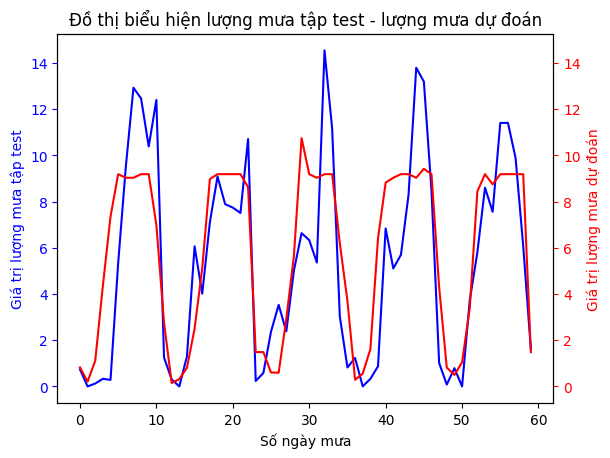

In [47]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số ngày mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()


- feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

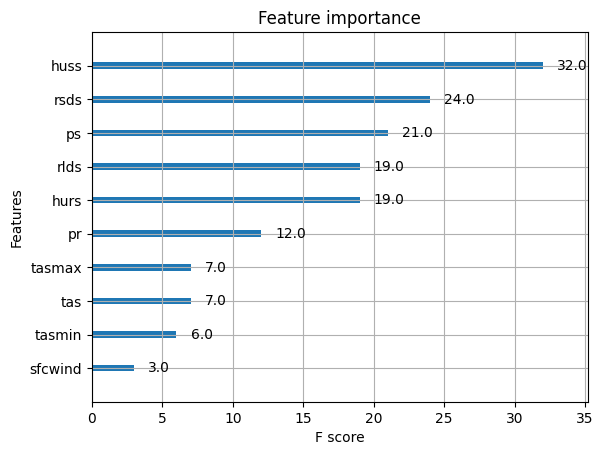

In [48]:
xgb_model.get_params()
xgb.plot_importance(xgb_model)

# Tunning Hyperparameter for LightGBM

- define model and parameter grid

In [49]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': 'True',
    'boosting_type':'dart'
}
model_LightGBM = lgb.LGBMRegressor(**params)

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'reg_lambda': lambda_val,
    'learning_rate': learning_rate
}

- Searching best hyperparameter

In [50]:
grid_search = GridSearchCV(
    estimator=model_LightGBM,
    param_grid=param_grid,
    cv=kfold,
    scoring=rmse_scorer,
    error_score='raise'
)
grid_result=grid_search.fit(X,y)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [51]:
# Xác định index của kết quả có RMSE nhỏ nhất
best_index = grid_result.cv_results_['mean_test_score'].argmin()

# Truy cập giá trị RMSE và bộ siêu tham số tương ứng
best_rmse = grid_result.cv_results_['mean_test_score'][best_index]
best_params = grid_result.cv_results_['params'][best_index]

# In ra giá trị RMSE nhỏ nhất và bộ siêu tham số tương ứng
print("Best RMSE:", best_rmse)
print("Best Parameters:", best_params)

Best RMSE: 2.811590958200005
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'reg_lambda': 0.3}


In [52]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

4.583862 (0.388727) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.001}
4.583866 (0.388724) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.01}
4.583924 (0.388710) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.1}
4.584058 (0.388672) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.3}
4.584174 (0.388638) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': 0.5}
4.819991 (0.448717) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 60, 'reg_lambda': 0.001}
4.819993 (0.448714) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 60, 'reg_lambda': 0.01}
4.820036 (0.448706) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 60, 'reg_lambda': 0.1}
4.820114 (0.448679) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 60, 'reg_lambda': 0.3}
4.820183 (0.448664) with: {'learning_rat

- using best hyperparameter

In [53]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': True,
    'boosting_type': 'dart',
    'n_estimators': 200,
    'max_depth': 2,
    'learning_rate': 0.1,
    'reg_lambda': 0.3
}

model_train_lightgbm = lgb.LGBMRegressor(**params)

# Fit the model with early stopping
model_train_lightgbm.fit(
    X_train,
    y_train
)

[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 1.651959


LGBMRegressor(boosting_type='dart', force_row_wise=True, max_depth=2,
              metric='mean_squared_error', n_estimators=200,
              objective='tweedie', reg_lambda=0.3)

- evaluate best model

In [54]:
y_pred_train = model_train_lightgbm.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print('Mean absolute Error Train:', mae)
print('Root mean squared Error Train:', rmse)
print("NSE Train:", nse)

Mean absolute Error Train: 1.7464850919427413
Root mean squared Error Train: 2.521111954584622
NSE Train: 0.6993290458114969


In [55]:
y_pred_test = model_train_lightgbm.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Mean absolute Error:', mae)
print('Root mean squared Error:', rmse)
print("NSE:", nse)

Mean absolute Error: 2.047496859032523
Root mean squared Error: 2.734787864895502
NSE: 0.6143082944280108


- cross validate

In [56]:
# Đánh giá độ chính xác
mae = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=mae_scorer)
rmse = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=rmse_scorer)
nse = cross_val_score(model_train_lightgbm,X,y, cv=kfold, scoring=nse_scorer)
print(f'RMSE of each fold:')
print(rmse)
print(f'mean RMSE of Fold: {rmse.mean()}')
print(f'\nMAE of each fold:')
print(mae)
print(f'mean MAE of Fold: {mae.mean()}')
print(f'\nNSE of each fold:')
print(nse)
print(f'mean NSE of Fold: {nse.mean()}')

[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.656058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.623759
[LightGBM] [Info] Total Bins 1266
[LightGBM] [Info] Number of data points in the train set: 378, number of used features: 10
[LightGBM] [Info] Start training from score 1.655677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set:

- visualize prediction and compare with actual

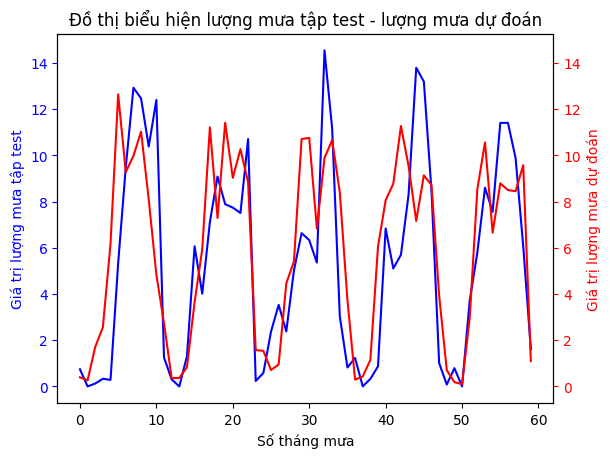

In [57]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số tháng mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test_lightgbm

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()


- feature importance

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

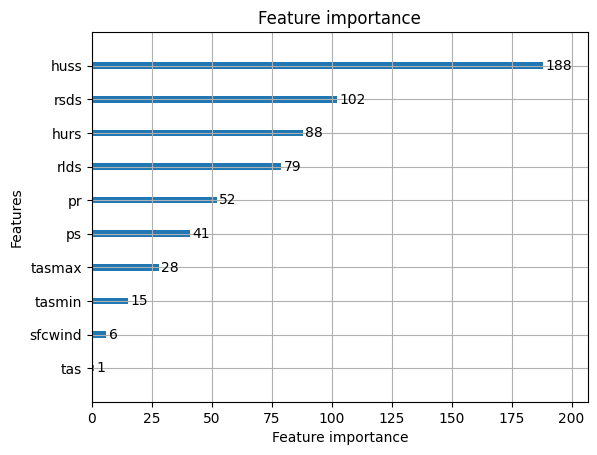

In [58]:
model_train_lightgbm.get_params()
lgb.plot_importance(model_train_lightgbm)